# **KEY_CONCEPTS**

* **Token IDs**: Token IDs are numerical representations of words, subwords, or characters in the input text.
They are produced by the tokenizer, which maps each word or subword to a unique integer based on the model's vocabulary. **Why Are They Needed?**
Neural networks process numbers, not raw text. Token IDs provide a numerical encoding of text that the model can interpret.

* We select a model - there is a tokenizer associated with it that transforms text to numerical-representation for it. i.e representations are specific to the tokenizer used

* Example: For the sentence "Transformers are amazing!", BERT’s tokenizer might split it as:

* **["[CLS]", "transformers", "are", "amazing", "!", "[SEP]"]**

* Each token is mapped to a unique ID from the tokenizer's vocabulary. Example mapping:

* **[101, 19081, 2024, 6429, 999, 102]**


* **Attention Mask**: A binary mask (1s and 0s) that indicates which tokens in the sequence should be attended to by the model.

* Transformer models process sequences of fixed length. To handle varying input lengths:
Shorter sequences: Are padded with a special padding token (e.g., [PAD]).

* Attention mask: Ensures the model ignores these padding tokens during computation.

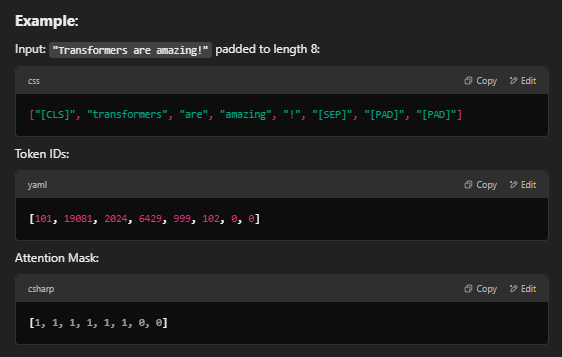

3. **Logits (Raw Scores)**
**What Are They?**
Logits are the raw, unnormalized outputs of the model's final layer.
For classification tasks, they represent the scores for each class before applying a normalization function like softmax.
**Why Are They Important?**
Logits are the model's predictions in their raw form.
They are converted into probabilities using softmax for multi-class classification or sigmoid for multi-label classification.

# **Install Required Libraries**


*   transformers: Library for state-of-the-art NLP models like BERT, GPT, and RoBERTa.
Allows loading pre-trained models, tokenizers, and utilities for fine-tuning.
*   For loading and preprocessing datasets from the Hugging Face Hub or local files.
*   torch (PyTorch): A deep learning library for building and training models. Handles model training, GPU/CPU usage, and autograd for gradient computation.
*   wandb (Weights & Biases): For experiment tracking and visualization.





1. **PEFT (Parameter-Efficient Fine-Tuning)**
PEFT is a set of techniques designed to fine-tune large pre-trained models more efficiently. Instead of updating all the parameters of a model (which can be computationally expensive and require a lot of memory), PEFT focuses on updating only a small subset of parameters. This makes fine-tuning faster, more memory-efficient, and accessible even on resource-constrained devices.

**Key Concepts of PEFT**
* Parameter-Efficiency: Only a small fraction of the model's parameters are updated during fine-tuning, reducing the computational and storage requirements.
Common techniques include adapters, low-rank updates, and lightweight modules.

* Low-Rank Adaptation (LoRA): LoRA injects low-rank matrices into the model's weights to adjust only a small portion of the model parameters during training.

* This allows fine-tuning without modifying the entire model.

**Advantages of PEFT**

* Reduced Compute Requirements: Updates fewer parameters, enabling fine-tuning on smaller GPUs or CPUs.
* Reuse of Pre-trained Models: Fine-tuning can be task-specific without modifying the core pre-trained model.

**Accelerate :** Accelerate is a library by Hugging Face designed to simplify the process of scaling deep learning models and training to multiple GPUs, TPUs, or even CPUs. It provides abstractions to handle distributed training, model parallelism, and device placement seamlessly.

In [45]:
pip install transformers datasets peft torch accelerate

# **AutoTokenizer**


* A utility for text tokenization.
* Automatically loads the correct tokenizer associated with a pre-trained model specified by its name or path.
Purpose:

* Converts raw text into numerical tokens that a model can understand.
* Handles tasks like splitting text into words, subwords, or characters and mapping them to integer IDs.
* Reverses the process (from tokens back to text) for human-readable outputs.

# **EXAMPLE OF TOKENIZER**

In [46]:
from transformers import AutoTokenizer

# Load tokenizer for a specific model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize text
text = "Transformers are amazing!"
encoded_input = tokenizer(text, return_tensors="pt")  # PyTorch tensors
print(encoded_input)

{'input_ids': tensor([[  101, 19081,  2024,  6429,   999,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


# **AutoModelForSequenceClassification**

* The AutoModelForSequenceClassification is a class from the Hugging Face transformers library designed specifically for sequence classification tasks.

* It allows you to load a pre-trained transformer-based model (like BERT, RoBERTa, GPT, etc.) and modify it for classifying input text into predefined categories.

* Takes tokenized inputs (from AutoTokenizer) and predicts class probabilities for a classification task.
* Tasks include sentiment analysis, topic classification, or any problem where input text is mapped to predefined labels.

# **The AutoTokenizer and AutoModelForSequenceClassification**

* Step 1: Tokenize Input Text

The AutoTokenizer preprocesses raw text into token IDs and attention masks.

* Step 2: Pass Tokens to the Model

The tokenized inputs are fed into the AutoModelForSequenceClassification to produce logits (raw scores).

* Step 3: Interpret Results

The logits are converted into probabilities (e.g., using softmax) to classify the input into predefined categories.

In [47]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Fine-tuning

In [48]:
from datasets import load_dataset, DatasetDict, Dataset
# load_dataset:  function - Downloads and loads datasets from the Hugging Face Dataset Hub

# DatasetDict: A dictionary-like object for managing multiple dataset splits (e.g., train, test, validation).

# Dataset: Represents a single split of a dataset (e.g., train, test, or validation).

In [49]:
from transformers import AutoTokenizer
# loads the tokenizer associated with a pre-trained model.
# Purpose: Converts raw text into token IDs and performs padding/truncation as required by the model.

In [50]:
from transformers import AutoConfig #Loads the configuration of a model (architecture, number of labels, etc.).

In [51]:
from transformers import AutoModelForSequenceClassification

#  Loads a pre-trained model for sequence classification tasks.

#Purpose: Add a classification head to the transformer for tasks like sentiment analysis.

In [52]:
from transformers import DataCollatorWithPadding
# A utility for dynamically padding batches to the same length during training.
#Purpose: Ensures efficient processing of batches with varying input lengths.

In [53]:
from transformers import Trainer # What it is: A high-level API for training and evaluating models.

In [54]:

from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig

# The peft library is designed to fine-tune large pre-trained models efficiently by freezing most of
# the model's parameters and training only a small subset

# Peft-Config: Configuration object for PEFT techniques.
# Purpose: Defines parameters for techniques like LoRA, such as rank and learning rate.

#What it is: Utility function to apply PEFT techniques to a model.
#Purpose: Converts a standard model into a PEFT-enabled model.
import torch
import numpy as np

### dataset

In [55]:
# # how dataset was generated

# # load imdb data
# imdb_dataset = load_dataset("imdb")

# # define subsample size
# N = 1000
# # generate indexes for random subsample
# rand_idx = np.random.randint(24999, size=N)

# # extract train and test data
# x_train = imdb_dataset['train'][rand_idx]['text']
# y_train = imdb_dataset['train'][rand_idx]['label']

# x_test = imdb_dataset['test'][rand_idx]['text']
# y_test = imdb_dataset['test'][rand_idx]['label']

# # create new dataset
# dataset = DatasetDict({'train':Dataset.from_dict({'label':y_train,'text':x_train}),
#                              'validation':Dataset.from_dict({'label':y_test,'text':x_test})})

In [56]:
# load dataset
dataset = load_dataset('shawhin/imdb-truncated') # Loads a dataset from the Hugging Face Hub
dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 1000
    })
})

In [57]:
# display % of training data with label=1
np.array(dataset['train']['label']).sum()/len(dataset['train']['label'])

0.5

### model

In [58]:
model_checkpoint = 'distilbert-base-uncased'

# define label maps
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative":0, "Positive":1}

# generate classification model from model_checkpoint
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### preprocess data

In [59]:
# create tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

# add pad token if none exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

"""

all input sequences must be the same length for efficient processing. If a model’s tokenizer doesn't
have a padding token, the padding functionality won’t work as expected, so this code ensures that padding
is handled appropriately.

if tokenizer.pad_token is None:: This checks if the tokenizer already has a pad_token defined.
The pad token is used for padding input sequences to the same length in a batch, so the model can
process them efficiently. If the tokenizer does not have a padding token, it will be added.

tokenizer.add_special_tokens({'pad_token': '[PAD]'}): This adds a special token, [PAD], to
the tokenizer's vocabulary as the padding token. This ensures that sequences are padded to the
maximum length in a batch using this token.

model.resize_token_embeddings(len(tokenizer)): This adjusts the model's token
embedding layer to accommodate the new token added to the tokenizer (in this case,
the [PAD] token). After adding new special tokens to the tokenizer, it's essential to
update the model’s embedding layer so that the model can handle the new tokens properly.
Without this, the model would not be able to process the newly added padding token.
"""

"\n\nall input sequences must be the same length for efficient processing. If a model’s tokenizer doesn't \nhave a padding token, the padding functionality won’t work as expected, so this code ensures that padding \nis handled appropriately.\n\nif tokenizer.pad_token is None:: This checks if the tokenizer already has a pad_token defined. \nThe pad token is used for padding input sequences to the same length in a batch, so the model can \nprocess them efficiently. If the tokenizer does not have a padding token, it will be added.\n\ntokenizer.add_special_tokens({'pad_token': '[PAD]'}): This adds a special token, [PAD], to \nthe tokenizer's vocabulary as the padding token. This ensures that sequences are padded to the \nmaximum length in a batch using this token.\n\nmodel.resize_token_embeddings(len(tokenizer)): This adjusts the model's token \nembedding layer to accommodate the new token added to the tokenizer (in this case, \nthe [PAD] token). After adding new special tokens to the toke

In [60]:
# create tokenize function
def tokenize_function(examples):
    # extract text
    text = examples["text"]

    #tokenize and truncate text
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        return_tensors="np", # okenized data in NumPy array format
        truncation=True,
        max_length=512 # maximum token length of the input text
    )

    return tokenized_inputs

"""
{
  'input_ids': np.array([101, 1024, 1025, 512, ... 0, 0, 0]),  # Token IDs (length = 512)
  'attention_mask': np.array([1, 1, 1, 1, ... 0, 0, 0])         # Attention Mask (length = 512)
}

"""

"\n{\n  'input_ids': np.array([101, 1024, 1025, 512, ... 0, 0, 0]),  # Token IDs (length = 512)\n  'attention_mask': np.array([1, 1, 1, 1, ... 0, 0, 0])         # Attention Mask (length = 512)\n}\n\n"

In [61]:
# tokenize training and validation datasets
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [62]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [63]:
from transformers import TrainingArguments

# allows you to specify a variety of configurations for model training

### evaluation

In [64]:
pip install evaluate

In [65]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

In [66]:
# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

### Apply untrained model to text

In [67]:
# define list of examples
text_list = ["It was good.", "Not a fan, don't recommed.", "Better than the first one.", "This is not worth watching even once.", "This one is a pass."]

print("Untrained model predictions:")
print("----------------------------")
for text in text_list:
    # tokenize text
    inputs = tokenizer.encode(text, return_tensors="pt")
    # compute logits
    logits = model(inputs).logits
    # convert logits to label
    predictions = torch.argmax(logits)

    print(text + " - " + id2label[predictions.tolist()])

Untrained model predictions:
----------------------------
It was good. - Negative
Not a fan, don't recommed. - Negative
Better than the first one. - Positive
This is not worth watching even once. - Negative
This one is a pass. - Negative


### **Train model - LoRA (Low-Rank Adaptation) configuration for fine-tuning a model on a sequence classification task.**

* task_type="SEQ_CLS"
task_type specifies the type of task you want to fine-tune the model for.
"SEQ_CLS" stands for Sequence Classification
*  r=4: r is the rank of the low-rank adaptation used in the LoRA method. It defines the number of low-rank matrices that will be added to the model to learn the new parameters.

* A smaller value of r reduces the number of parameters being modified, making the fine-tuning process more efficient. In this case, r=4 means the model will introduce 4 low-rank matrices during the fine-tuning process.

*  lora_alpha=32
lora_alpha is a scaling factor applied to the low-rank matrices. This scaling helps control the influence of the adapted parameters.
lora_alpha=32 means that the contribution of the low-rank adaptation matrices will be scaled by a factor of 32. This value influences how much the newly learned parameters will affect the model's performance.

* lora_dropout=0.01
lora_dropout applies dropout to the low-rank adaptation layers. Dropout is used to prevent overfitting by randomly setting some of the values in the adaptation matrices to zero during training.
lora_dropout=0.01 means that there is a 1% chance for dropout to occur on the LoRA parameters. This ensures that the model doesn’t overly rely on the adapted weights, which can improve generalization.

In [68]:
peft_config = LoraConfig(task_type="SEQ_CLS",
                        r=4,
                        lora_alpha=32,
                        lora_dropout=0.01,
                        target_modules = ['q_lin'])

In [69]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9307


In [70]:
# hyperparameters
lr = 1e-3
batch_size = 4
num_epochs = 10

In [71]:
# define training arguments
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [72]:
# creater trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,# this will dynamically pad examples in each batch to be equal length
    compute_metrics=compute_metrics,
)

# train model
trainer.train()

<ipython-input-72-7fae756b6c66>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.470145,{'accuracy': 0.859}
2,0.438600,0.401272,{'accuracy': 0.882}
3,0.438600,0.588117,{'accuracy': 0.879}
4,0.208000,0.658922,{'accuracy': 0.89}
5,0.208000,0.841865,{'accuracy': 0.884}
6,0.058300,0.868291,{'accuracy': 0.88}
7,0.058300,0.987301,{'accuracy': 0.887}
8,0.014700,1.003053,{'accuracy': 0.886}
9,0.014700,1.035890,{'accuracy': 0.888}
10,0.002800,1.041113,{'accuracy': 0.884}


Trainer is attempting to log a value of "{'accuracy': 0.859}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.882}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.879}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.89}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.884}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This in

TrainOutput(global_step=2500, training_loss=0.14450548000335695, metrics={'train_runtime': 439.5653, 'train_samples_per_second': 22.75, 'train_steps_per_second': 5.687, 'total_flos': 1112883852759936.0, 'train_loss': 0.14450548000335695, 'epoch': 10.0})

### Generate prediction

In [73]:
model.to('cuda') # moving to mps for Mac (can alternatively do 'cpu')

print("Trained model predictions:")
print("--------------------------")
text_list = [
    # First 5 positive sentences
    "I love this product! It's amazing.",
    "The movie was fantastic. I really enjoyed it.",
    "I feel so happy with my new job. It's everything I hoped for.",
    "Such a wonderful day, everything went great!",
    "I'm really excited for the upcoming event.",

    # Next 5 negative sentences
    "The movie was terrible. I hated it.",
    "I had a horrible experience with customer service.",
    "This is the worst restaurant I've ever been to.",
    "I am so frustrated with the current situation.",
    "The product arrived damaged, and the quality is poor."
]
for text in text_list:
    inputs = tokenizer.encode(text, return_tensors="pt").to("cuda") # moving to mps for Mac (can alternatively do 'cpu')

    logits = model(inputs).logits
    predictions = torch.max(logits,1).indices

    print(text + " - " + id2label[predictions.tolist()[0]])

Trained model predictions:
--------------------------
I love this product! It's amazing. - Positive
The movie was fantastic. I really enjoyed it. - Positive
I feel so happy with my new job. It's everything I hoped for. - Positive
Such a wonderful day, everything went great! - Positive
I'm really excited for the upcoming event. - Positive
The movie was terrible. I hated it. - Negative
I had a horrible experience with customer service. - Negative
This is the worst restaurant I've ever been to. - Negative
I am so frustrated with the current situation. - Negative
The product arrived damaged, and the quality is poor. - Negative
